In [1]:
from models.vanderpol import VanDerPol, VanDerPol_UnitBox
from models.sir import SIR_UnitBox, SIR
from models.harosc import HarOsc
from models.oscpart import OscPart

from kaa.settings import PlotSettings, KaaSettings
from kaa.timer import Timer

from kaa.reach import ReachSet
from kaa.plotutil import Plot
from kaa.trajectory import Traj

from kaa.temp.pca_strat import PCAStrat
from kaa.temp.lin_app_strat import LinStrat
from kaa.temp.pca_lin_strat import PCALinStrat

from itertools import product

KaaSettings.SuppressOutput = True


# Harmonic Oscillator rotating $\pi/4$ (7 Steps)



## Linear Approximation Strategy

* Directions calculated from the linear approximation strategy are maximized over **both** the previously computed initial box template and the previously computed linear app. templates.

* Simulated for 7 time steps.

Initial Box: $[[-5,-4],[0,1]]$

Plotting phase for dimensions x, y done -- Time Spent: 0.26071596145629883
Average Generator Procedure Duration: 0.0004098370105405397 sec
Average Functional Composition Duration: 0.0028806872227612663 sec
Average Bound Computation Duration: 0.003407997243544635 sec
Average Reachable Set Computation Duration: 0.21280929020472936 sec
Average Phase Duration: 0.26071596145629883 sec


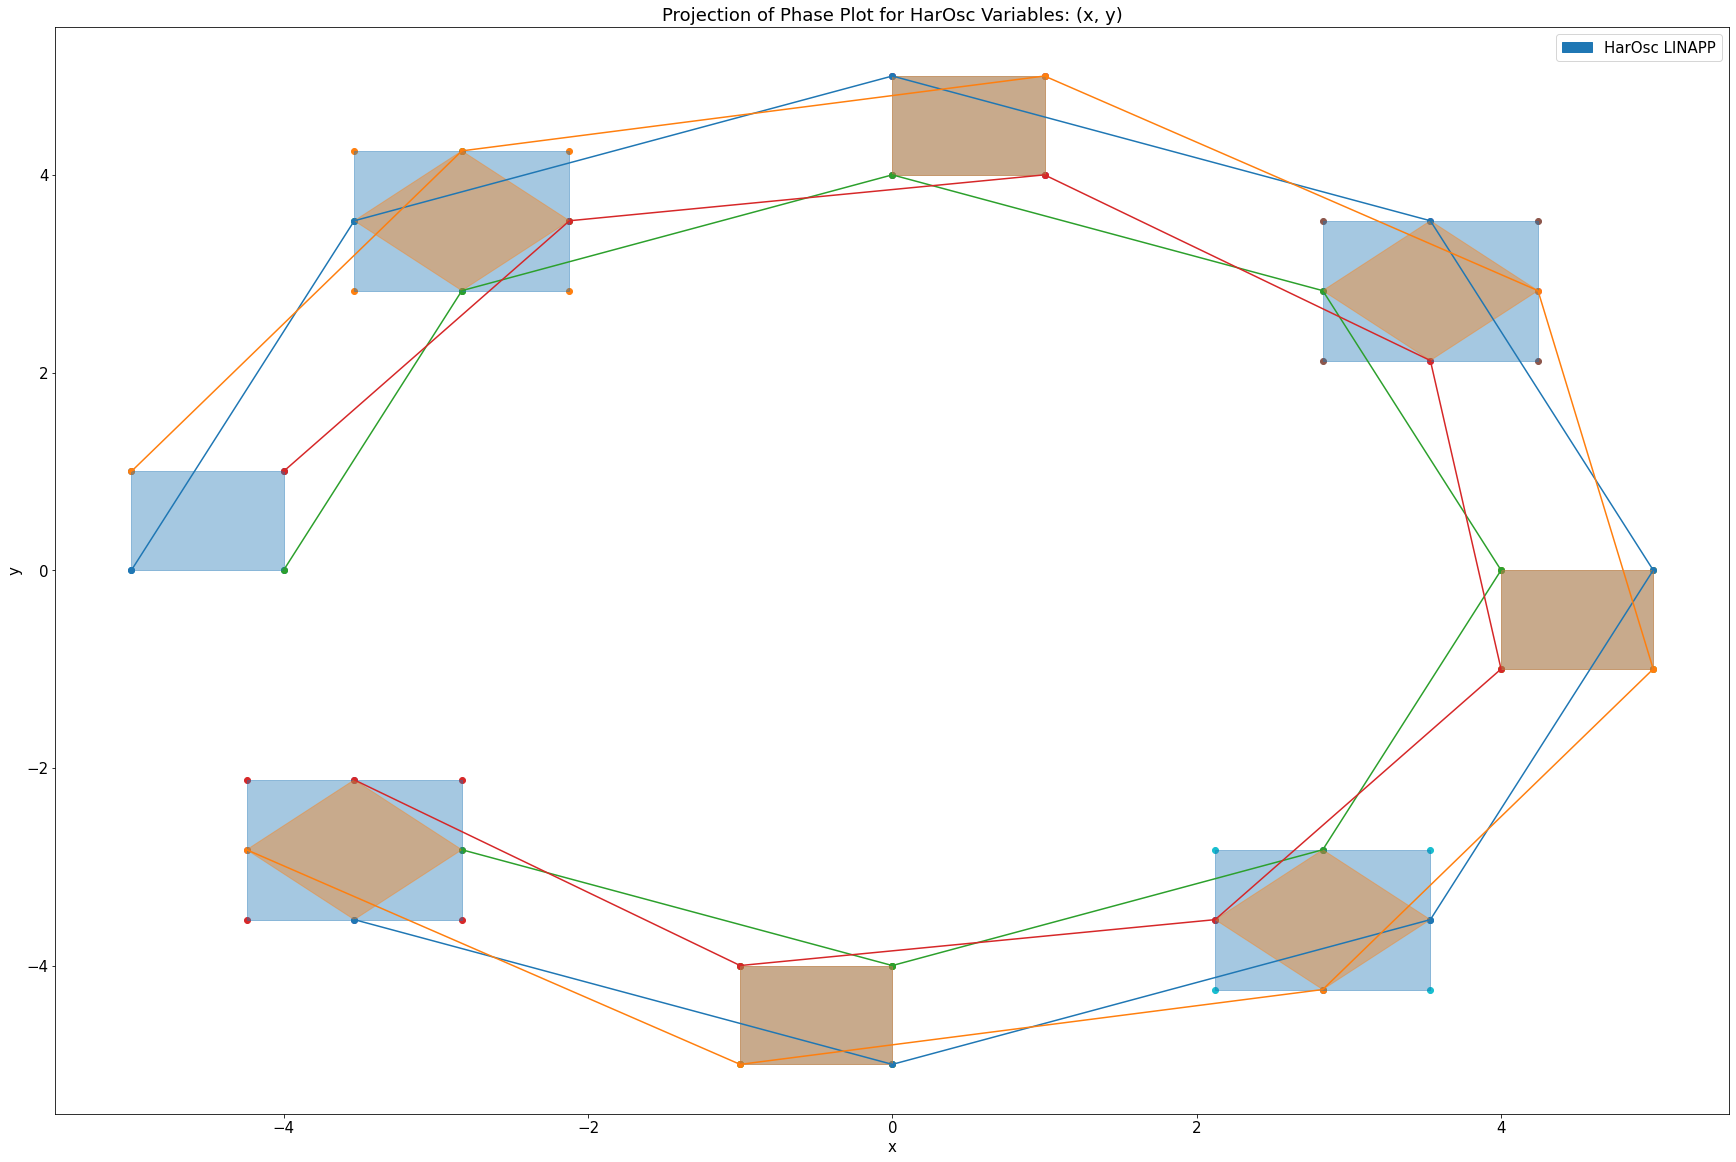

In [2]:
NUM_STEPS = 7

model = HarOsc()
#trajs = generate_traj(model, 10, 200)
mod_reach = ReachSet(model)
#mod_flow = mod_reach.computeReachSet()

sir_plot = Plot()
#mod_flow = mod_reach.computeReachSet(NUM_STEPS)

SIR_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
lin_strat = LinStrat(model, iter_steps=SIR_LIN_ITER_STEPS)
mod_lin_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)
trajs = [Traj(model, point, steps=NUM_STEPS) for point in product([-5,-4],[0,1])]

'Generaste the trajectories and add them to the plot.'
sir_plot.add(mod_lin_flow, "HarOsc LINAPP")
for t in trajs:
    sir_plot.add(t)

sir_plot.plot2DPhase(0,1, separate=True, plotvertices=True)
Timer.generate_stats()

## PCA Strategy

* PCA is run on every step and the PCA component directions are maximized over **both** the previous initial box template and previously computed PCA template.

* 100 trajectories are sampled for the PCA routine and each trajectory is propagated forward in time for exactly **one** step.

* Simulated for 5 time steps.

Initial Box: $[[-5,-4],[0,1]]$


Plotting phase for dimensions x, y done -- Time Spent: 0.21979618072509766
Average Generator Procedure Duration: 0.00033833589078190385 sec
Average Functional Composition Duration: 0.0031522159223203307 sec
Average Bound Computation Duration: 0.003144415440382781 sec
Average Reachable Set Computation Duration: 1.498255026967902 sec
Average Phase Duration: 0.26807673772176105 sec


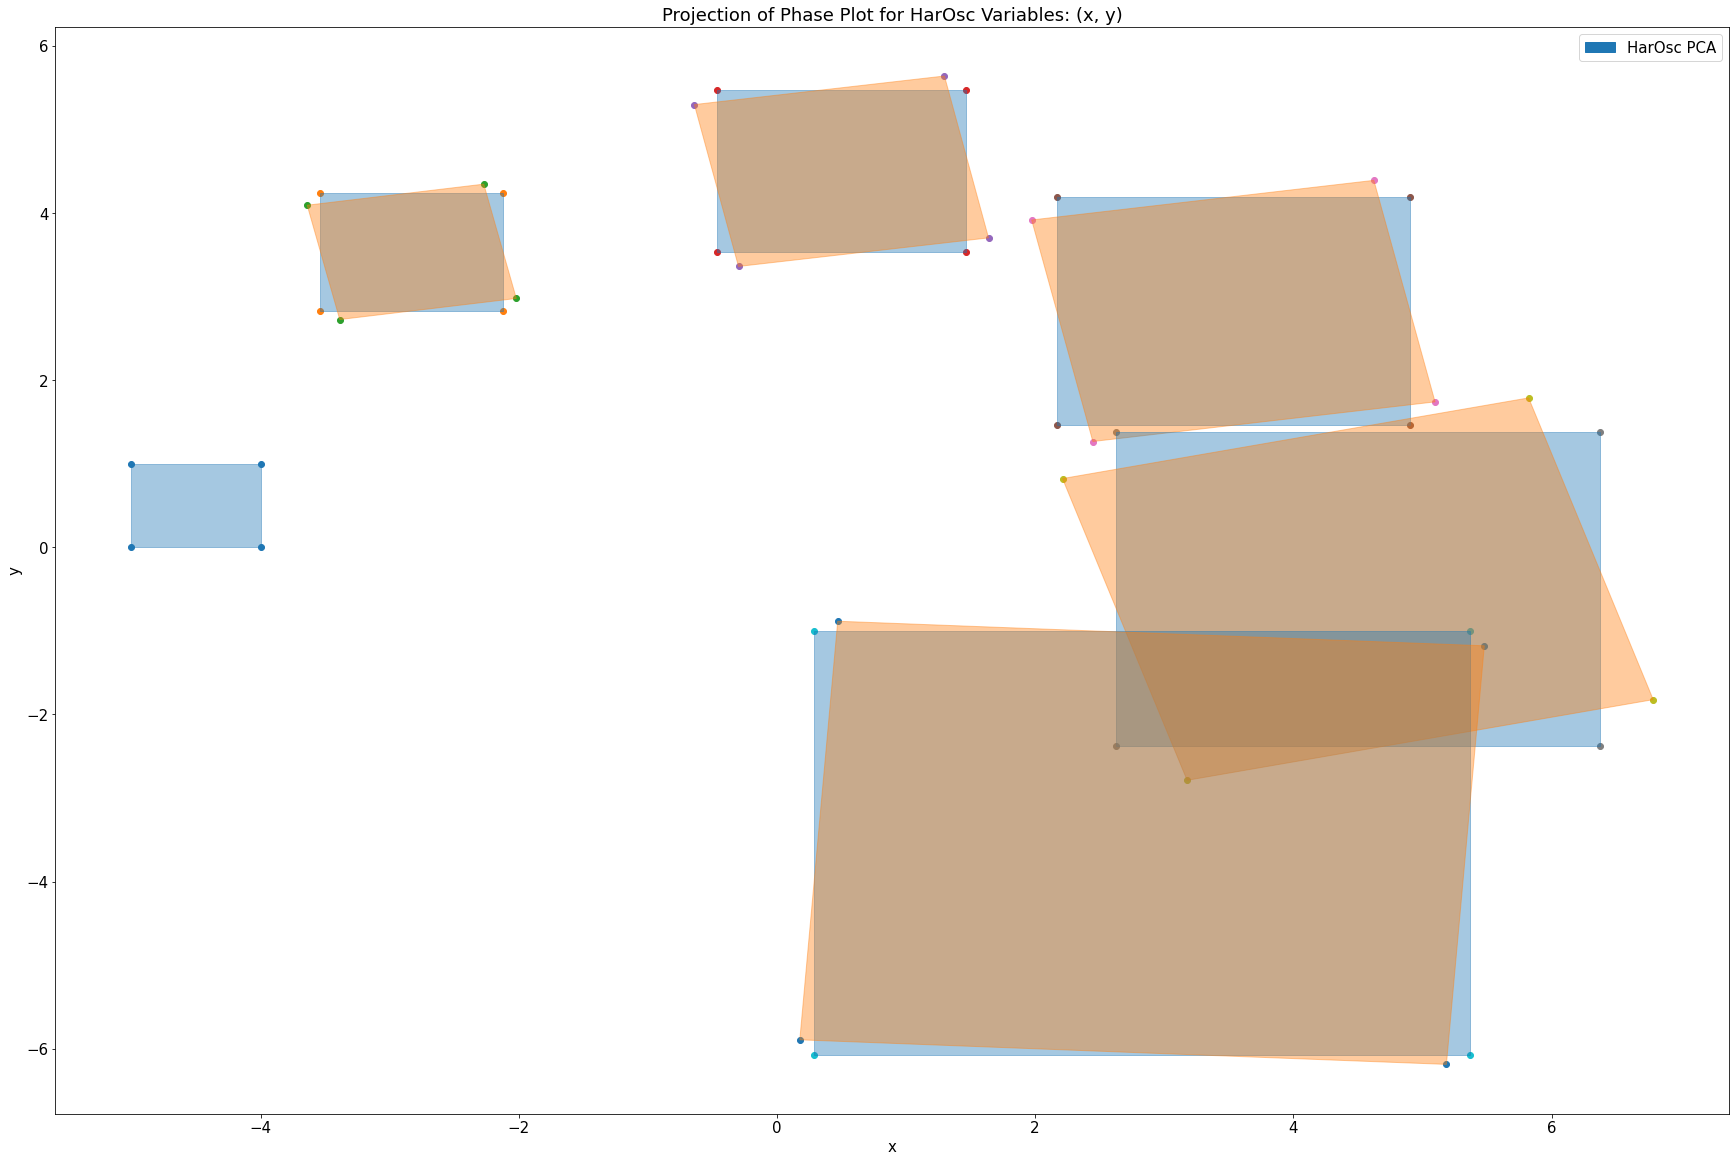

In [5]:
NUM_STEPS = 5

model = HarOsc()
mod_reach = ReachSet(model)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 200 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
#vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

## PCA & LinApp Tandem Strategy

* Strategy where both PCA and lin. app. strategies are generating directions. Once the directions from both schemes are appended to directions matrix, they are maximized over all previously computed templates.

* Simulated for 7 steps.

* As expected, the Lin. App. strategy is already tight, so running PCA yields no advantages. 

* The **blue** template is our initial box, the **green** template is our Lin. App. template, and the **orange** template is our PCA template

Initial Box: $[[-5,-4],[0,1]]$

Plotting phase for dimensions x, y done -- Time Spent: 0.2409210205078125
Average Generator Procedure Duration: 0.0003349458534144251 sec
Average Functional Composition Duration: 0.003006998620002098 sec
Average Bound Computation Duration: 0.002992121612324434 sec
Average Reachable Set Computation Duration: 1.9674303314902566 sec
Average Phase Duration: 0.2590480804443359 sec


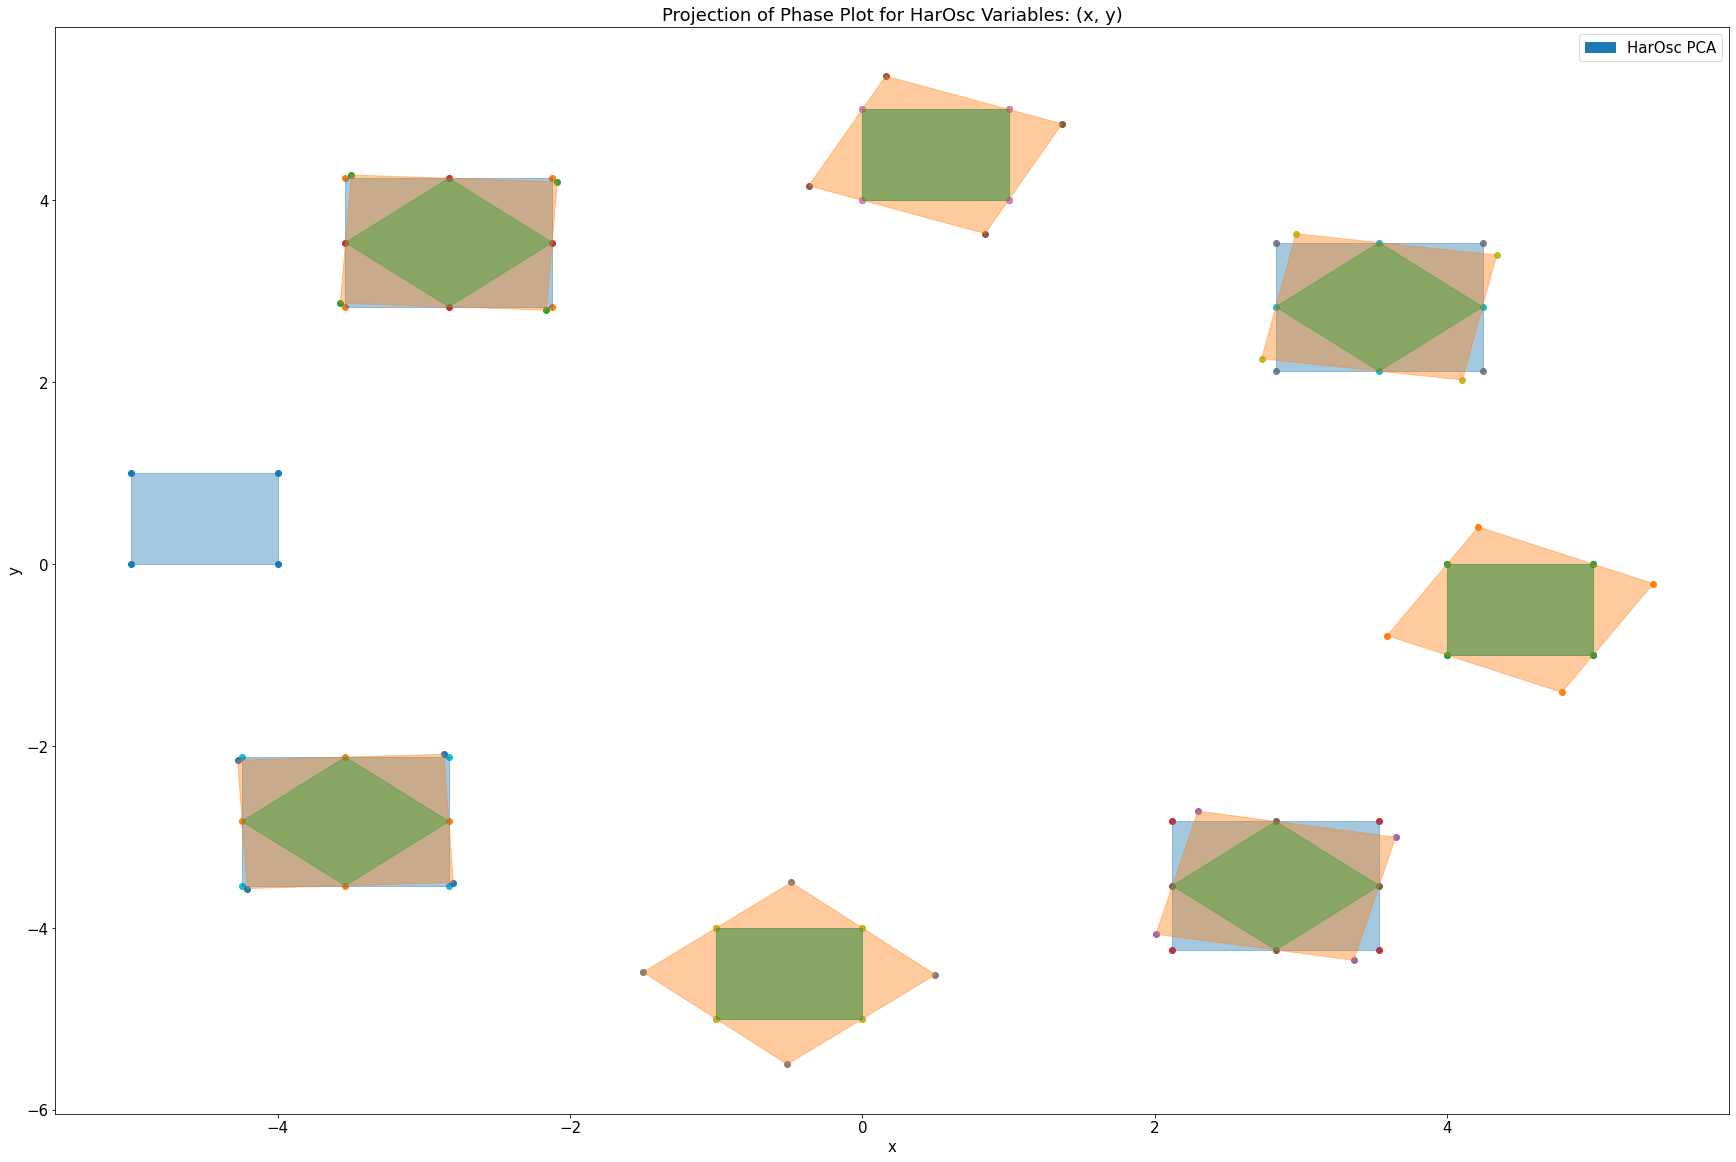

In [7]:
NUM_STEPS = 7

model = HarOsc()
mod_reach = ReachSet(model)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 250 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCALinStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)

vdp_plot = Plot()
#vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

# VanderPol System ($\Delta = 0.08$, 40 steps)

## Linear Approximation Strategy

* Initial Box: $[[0,0.1],[1.9,2]]$
* The lin. app. directions are calculated every time step.
* The degeneracy that Stan mentioned when the points become closely compressed together seems to take effect after time step **30** or so. 

Plotting phase for dimensions x, y done -- Time Spent: 0.47888922691345215
Average Generator Procedure Duration: 0.00033357645911562565 sec
Average Functional Composition Duration: 0.0060676594758981225 sec
Average Bound Computation Duration: 0.020150979230833543 sec
Average Reachable Set Computation Duration: 2.934001886143404 sec
Average Phase Duration: 0.5776106516520182 sec


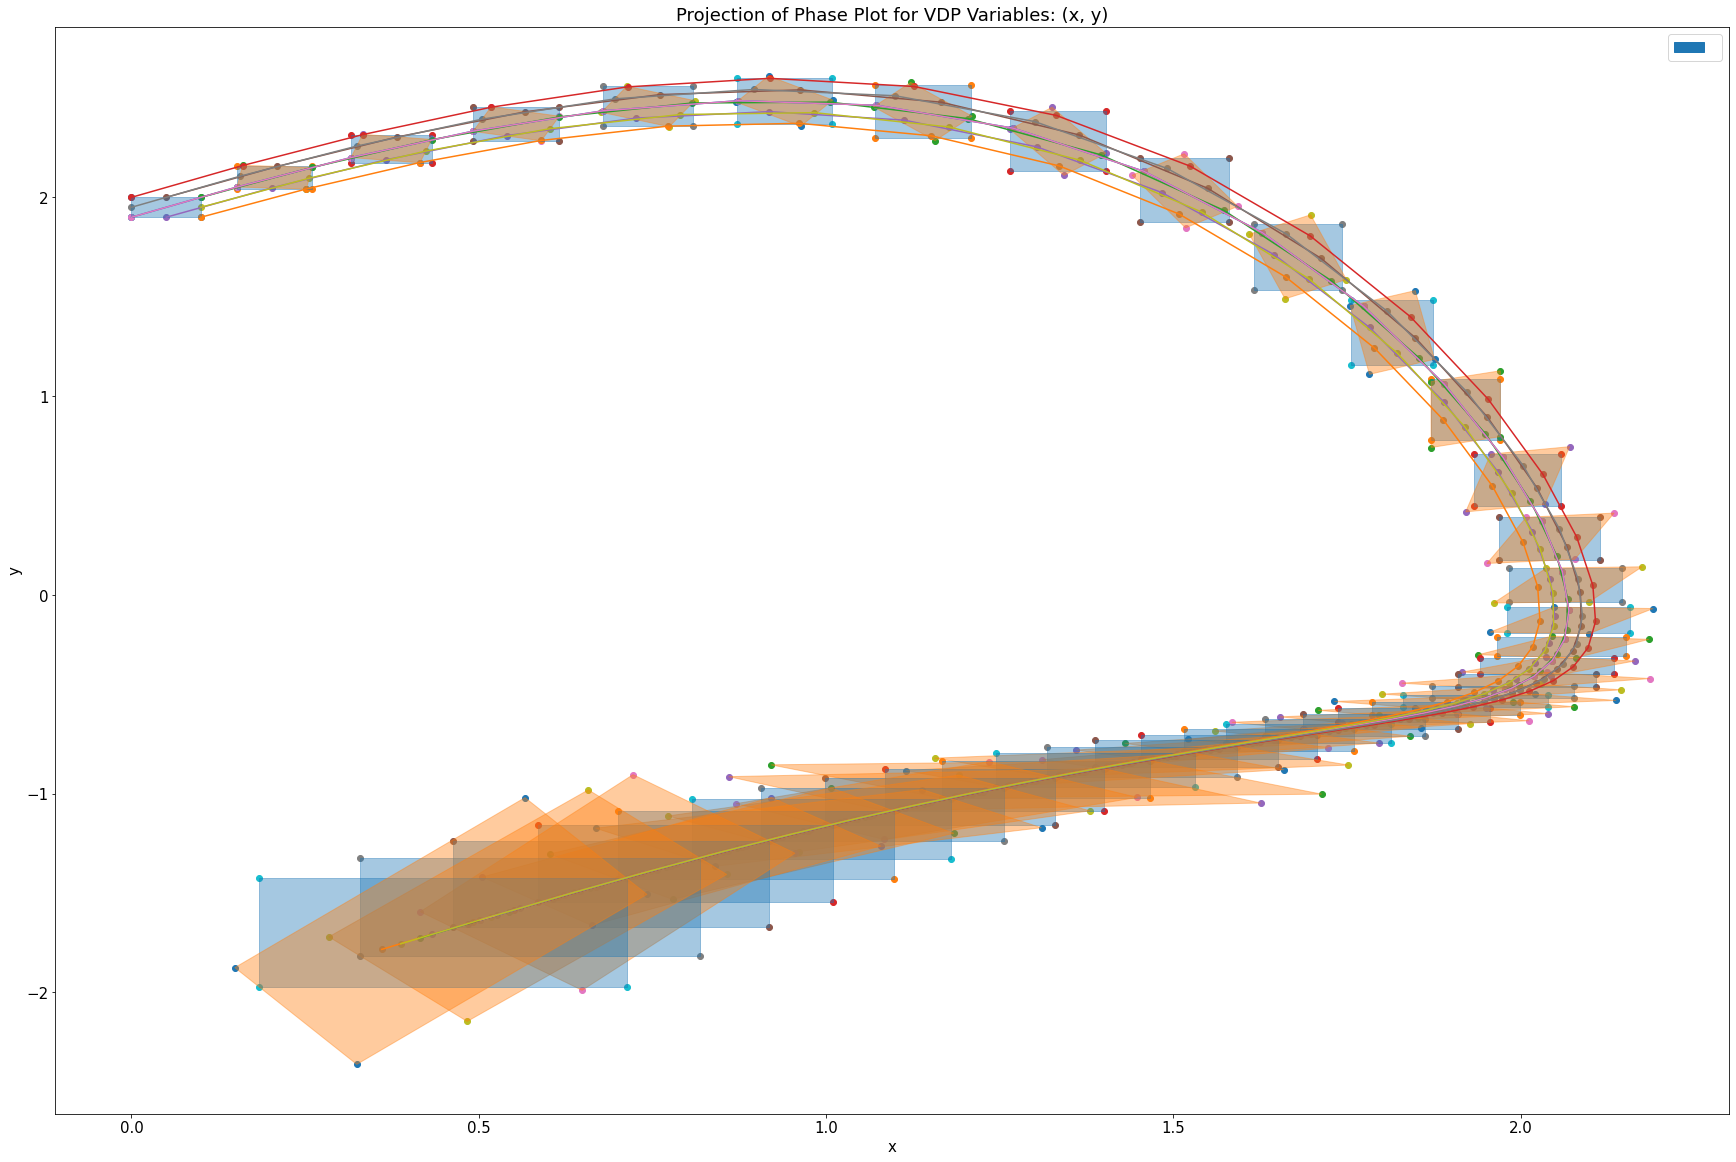

In [5]:
NUM_STEPS = 40
VDP_LIN_ITER_STEPS = 1 #Number of steps between each recomputation of LinApp Templates.

unit_model = VanDerPol_UnitBox(delta=0.08)
unit_mod_reach = ReachSet(unit_model)

lin_strat = LinStrat(unit_model, iter_steps=VDP_LIN_ITER_STEPS)
mod_lin_flow = unit_mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)

points = [[0,1.90], [0.1, 1.90], [0.1,2], [0,2], [0.05,1.9], [0.05,2], [0,1.9],  [0,1.95], [0.1,1.95]]
trajs = [Traj(unit_model, point, NUM_STEPS) for point in points]

vdp_plot = Plot()
vdp_plot.add(mod_lin_flow)

'Add trajectories'
for traj in trajs:
    vdp_plot.add(traj)

vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)

Timer.generate_stats()

## PCA & LinApp Tandem Strategy

* Initial Box: $[[0,0.1],[1.9,2]]$
* Ran for **40** Steps
* From the plots, it seems that running **both** PCA and the Linear App. strategy significantly increases the accuracy of the reachable set especially for the skinny bottleneck after step 30.

* It seems that both strategies seem to synergize when maximizing over both of the templates computed in the previous step.

Plotting phase for dimensions x, y done -- Time Spent: 0.6360440254211426


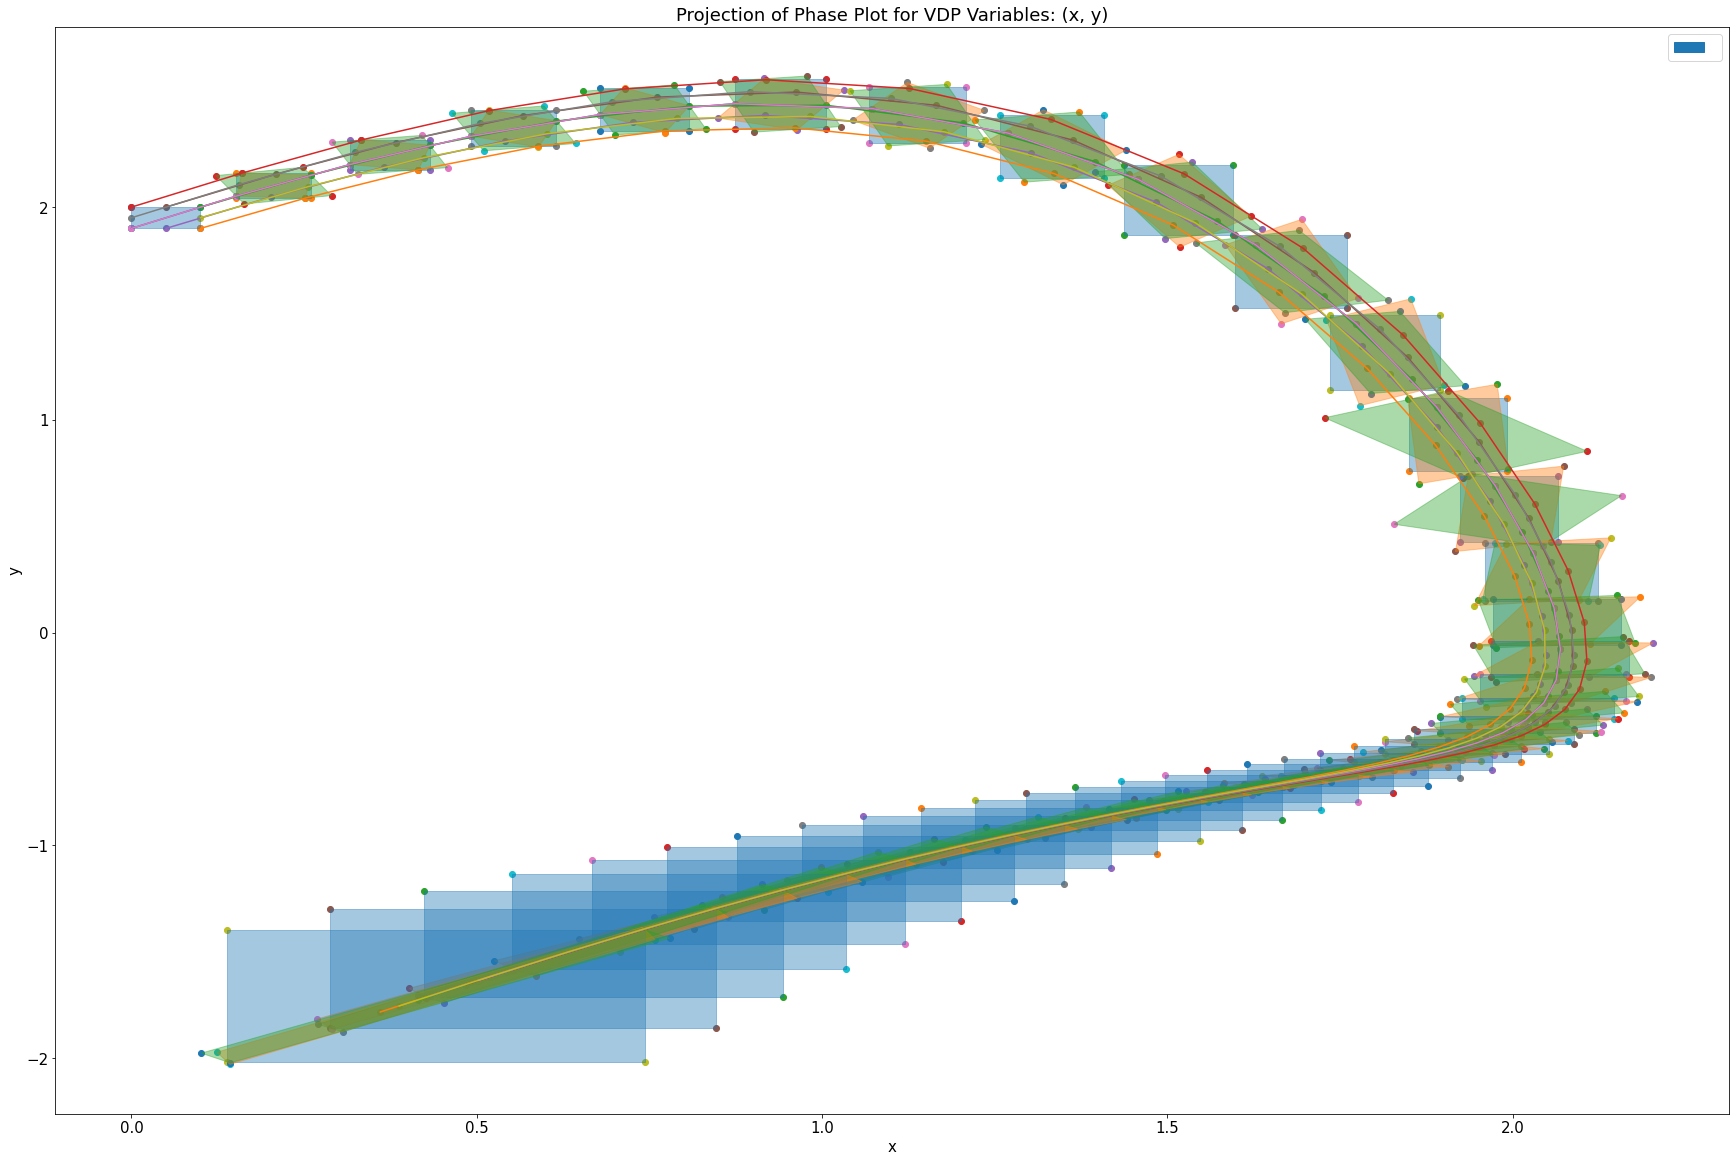

In [3]:
NUM_STEPS = 40
VDP_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
VDP_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
VDP_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

unit_model = VanDerPol_UnitBox(delta=0.08)
unit_mod_reach = ReachSet(unit_model)

lin_strat = PCALinStrat(unit_model, traj_steps=VDP_PCA_TRAJ_STEPS, num_trajs=VDP_PCA_NUM_TRAJ, iter_steps=VDP_PCA_ITER_STEPS)
mod_lin_flow = unit_mod_reach.computeReachSet(NUM_STEPS, tempstrat=lin_strat)

points = [[0,1.90], [0.1, 1.90], [0.1,2], [0,2], [0.05,1.9], [0.05,2], [0,1.9],  [0,1.95], [0.1,1.95]]
trajs = [Traj(unit_model, point, NUM_STEPS) for point in points]

vdp_plot = Plot()
vdp_plot.add(mod_lin_flow)

'Add trajectories'
for traj in trajs:
    vdp_plot.add(traj)

vdp_plot.plot2DPhase(0,1, separate=True, plotvertices=True)


# SIR Model ($\Delta = 0.5$)

## Linear Approximation

* Initial Box: $[[0.79,0.8], [0.19, 0.2], 0]$
* The Lin. App. Strategy here seems to degenerate into templates which do not seem to look like paralllelotopes on projections on the $(S,I)$ variables.
* The results also wildly differ on each experiment iteration. The template regions can explode in just 7-8 steps. I suspect that is may occur as a result of the points we randomly sample on the template regions. 
* Thus, **where we sample on the template region** seems to seriously affect the resulting directions we get for SIR.


Plotting phase for dimensions s, i done -- Time Spent: 0.22181081771850586
Average Generator Procedure Duration: 0.0006721327295976944 sec
Average Functional Composition Duration: 0.0053989932911606125 sec
Average Bound Computation Duration: 0.031156450167469596 sec
Average Reachable Set Computation Duration: 0.972509497501811 sec
Average Phase Duration: 0.22949926669781023 sec


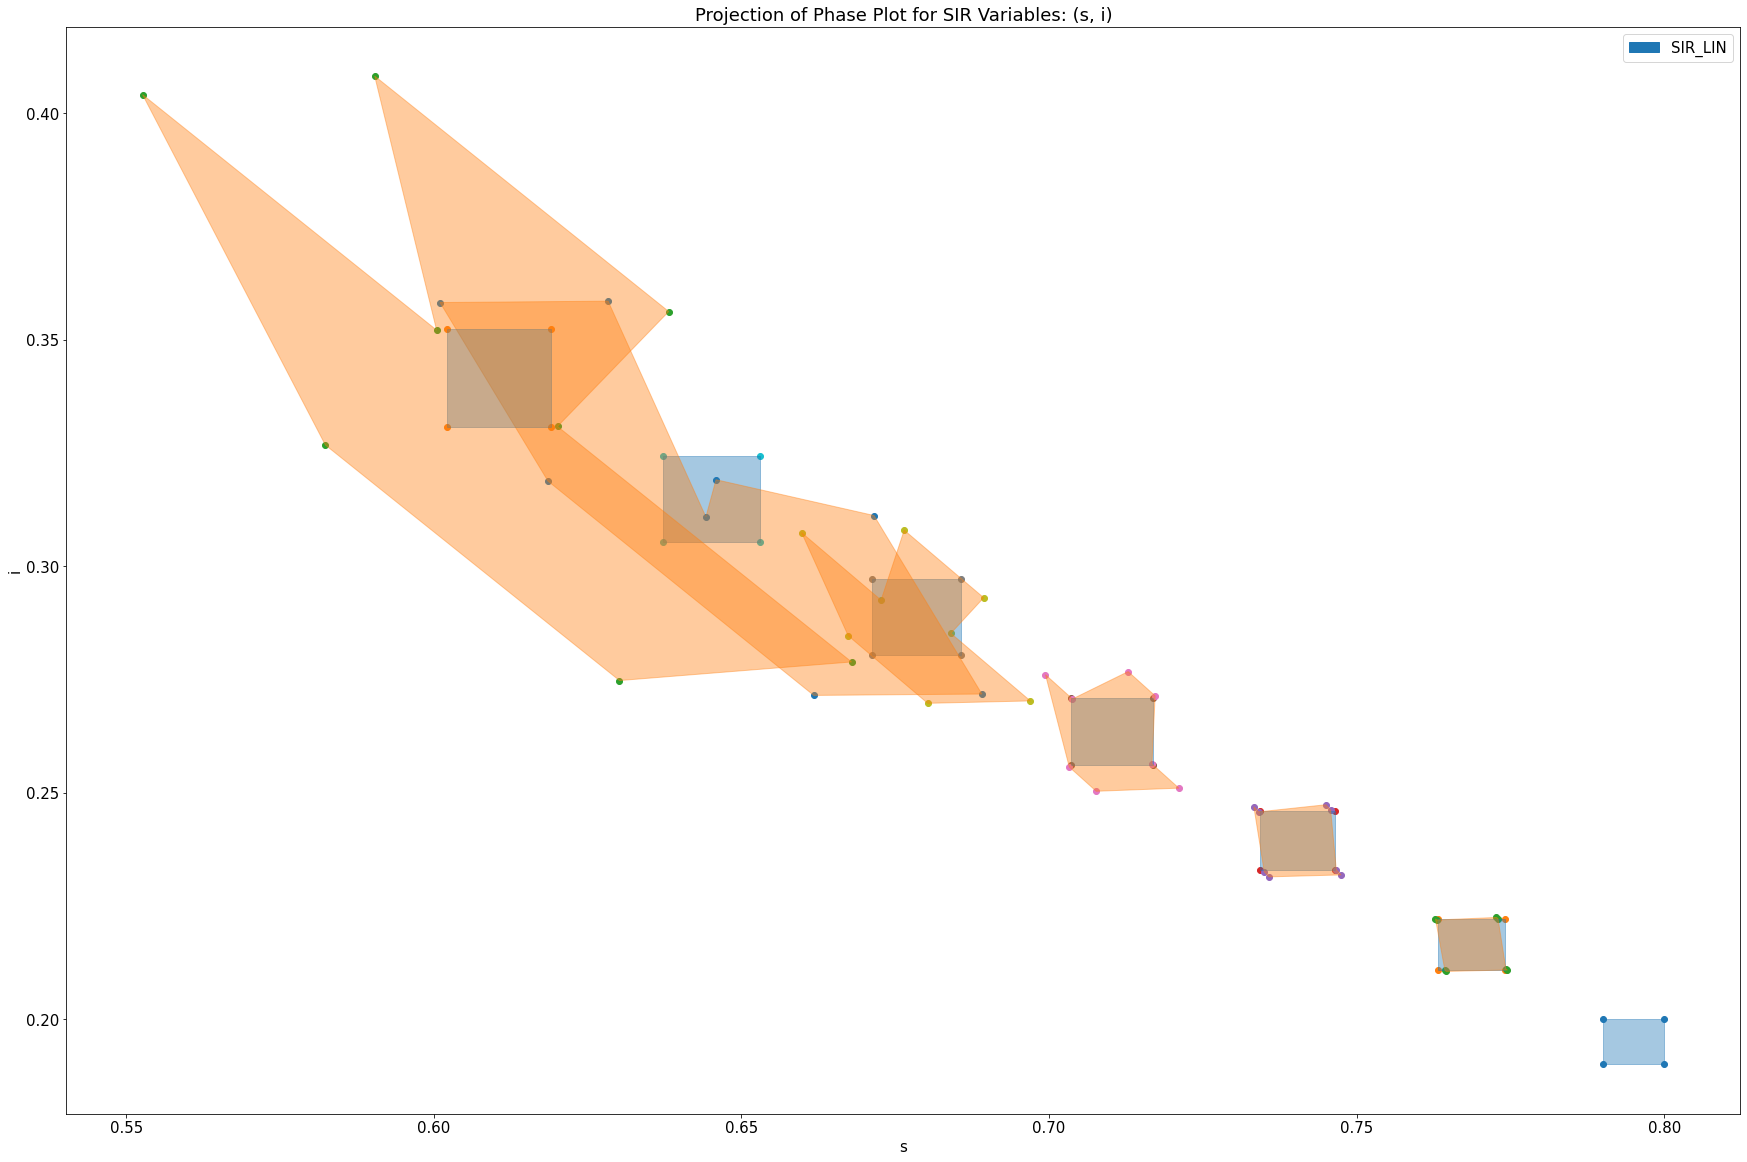

In [10]:
NUM_STEPS = 6
SIR_LIN_ITER_STEPS = 1 

sir_lin = SIR_UnitBox(delta=0.5)
sir_plot = Plot()

sir_lin_reach = ReachSet(sir_lin)
sir_flow_lin = sir_lin_reach.computeReachSet(NUM_STEPS, LinStrat(sir_lin, iter_steps=SIR_LIN_ITER_STEPS))
sir_plot.add(sir_flow_lin, "SIR_LIN")

sir_plot.plot2DPhase(0,1,separate=True, plotvertices=True)
Timer.generate_stats()

## PCA Strategy

* Ran for **30** steps with the PCA routine running with 200 randomly generated trajectories. The trajectories are propagated for 1 step forward. 

Plotting phase for dimensions s, i done -- Time Spent: 0.348146915435791
Average Generator Procedure Duration: 0.0005895370944495175 sec
Average Functional Composition Duration: 0.0052129662398136024 sec
Average Bound Computation Duration: 0.031150318456418587 sec
Average Reachable Set Computation Duration: 56.96512087186178 sec
Average Phase Duration: 0.348146915435791 sec


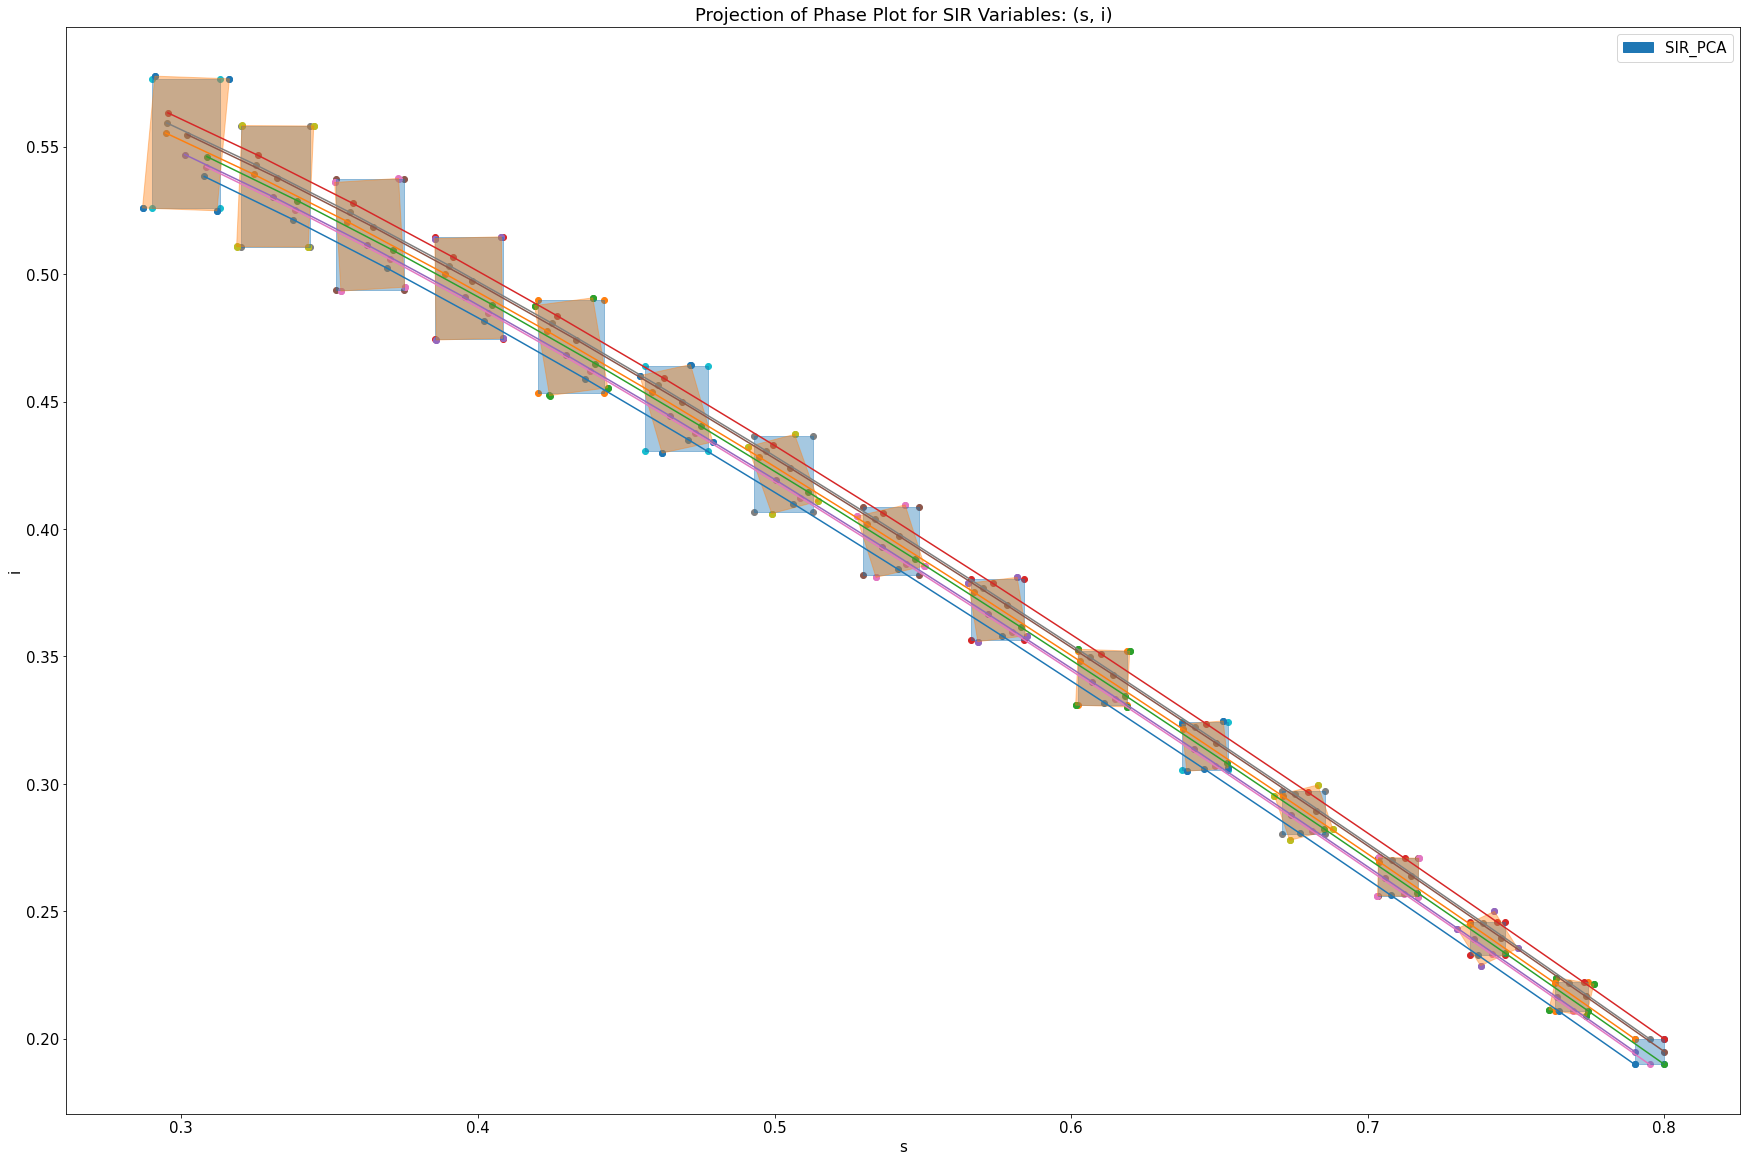

In [2]:
NUM_STEPS = 15
SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

sir_pca = SIR_UnitBox(delta=0.5)
sir_plot = Plot()

points = [[0.79,0.19,0], [0.79, 0.2,0], [0.8,0.19,0], [0.8,0.2,0], [0.79,0.195,0], [0.8,0.195,0], [0.795,0.19,0],  [0.795,0.2,0]]
trajs = [Traj(sir_pca, point, NUM_STEPS) for point in points]

pca_strat = PCAStrat(sir_pca, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)

sir_pca_reach = ReachSet(sir_pca)
sir_flow_pca = sir_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)
sir_plot.add(sir_flow_pca, "SIR_PCA")

'Add trajectories'
for traj in trajs:
    sir_plot.add(traj)

sir_plot.plot2DPhase(0,1,separate=True, plotvertices=True)    
Timer.generate_stats()


## PCA & LinApp Tandem Strategy


* This computation was run for 15 steps.
* Similar to the VDP model, running both PCA and LinApp and maximixing over both templates for each step seems to significantly increase the quality of our reachable set.
* Furthermore, the degenerate behavior seen with using the Lin. App. strategy alone seems to have disappeared with using this combined scheme.


Plotting phase for dimensions s, i done -- Time Spent: 0.3987998962402344
Average Generator Procedure Duration: 0.0006155355671094512 sec
Average Functional Composition Duration: 0.0055135810802347885 sec
Average Bound Computation Duration: 0.03900564377005015 sec
Average Reachable Set Computation Duration: 79.85547907352448 sec
Average Phase Duration: 0.3734734058380127 sec


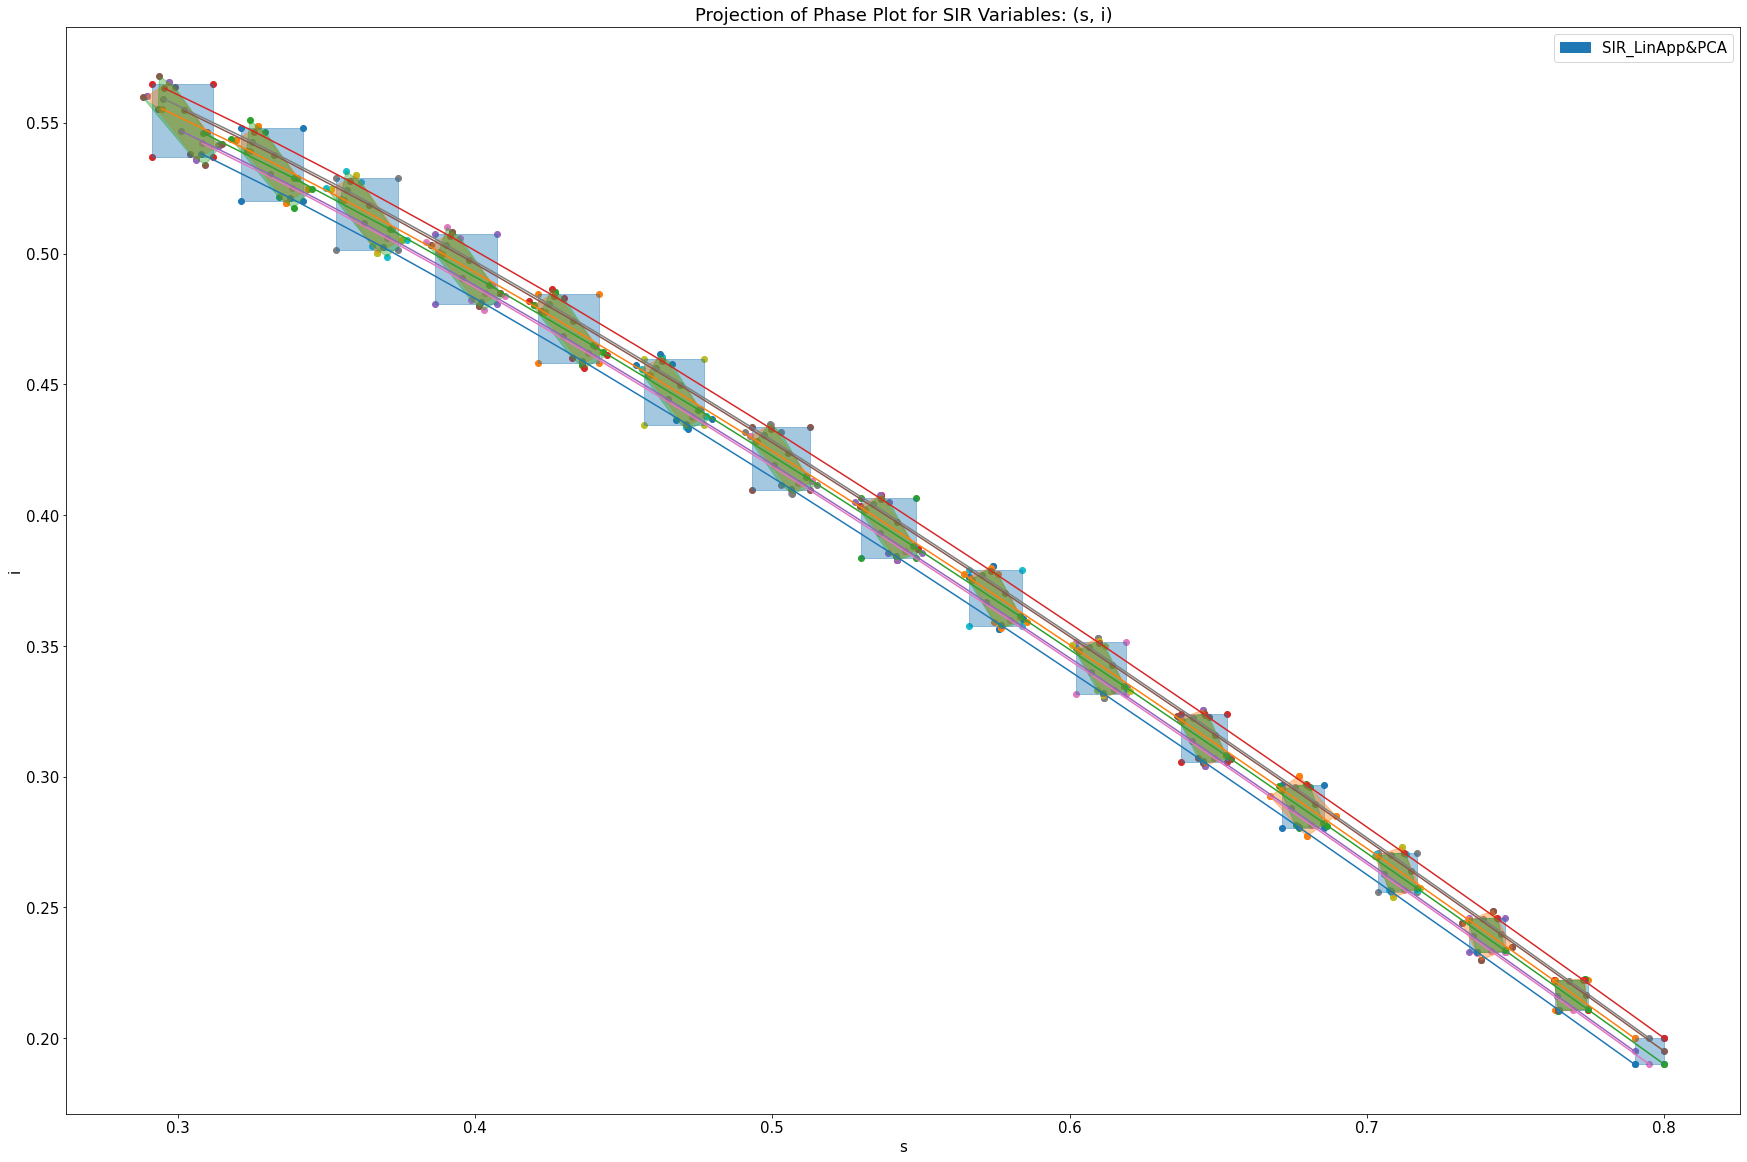

In [3]:
NUM_STEPS = 15
SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 1 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

sir_pca = SIR_UnitBox(delta=0.5)
sir_plot = Plot()

points = [[0.79,0.19,0], [0.79, 0.2,0], [0.8,0.19,0], [0.8,0.2,0], [0.79,0.195,0], [0.8,0.195,0], [0.795,0.19,0],  [0.795,0.2,0]]
trajs = [Traj(sir_pca, point, NUM_STEPS) for point in points]

pca_strat = PCALinStrat(sir_pca, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)

sir_pca_reach = ReachSet(sir_pca)
sir_flow_pca = sir_pca_reach.computeReachSet(NUM_STEPS, tempstrat=pca_strat)
sir_plot.add(sir_flow_pca, "SIR_LinApp&PCA")

'Add trajectories'
for traj in trajs:
    sir_plot.add(traj)

sir_plot.plot2DPhase(0,1,separate=True, plotvertices=True)    
Timer.generate_stats()